In [3]:
import numpy as np
import matplotlib.pyplot as plt

## ASSIGMENT III


## PART I

In [4]:
sigma_w_2 = 28**2
sigma_n_2 = 97**2
Points = 300
position = 10   
hi = sigma_w_2/sigma_n_2
alfa = (-hi+ np.sqrt(hi**2+4*hi))/2
M = 7

path = []
noise_path = []

measurements = []
noise_measurments = [] 

measurements_smoothed = np.zeros((1, Points))
measurements_smoothed_b = np.zeros((1, Points))

In [3]:
## Making plot and noise generating

for i in range(0, Points):
    noise_path.append(np.random.normal(0, np.sqrt(sigma_w_2)))
    position += noise_path[i]
    path.append(position)
    noise_measurments.append(np.random.normal(0, np.sqrt(sigma_n_2)))
    step = position + noise_measurments[i]
    measurements.append(step)

    if i == 0:
        measurements_smoothed[0, i] =

measurements = [] measurements[0]
    else:
        measurements_smoothed[0, i] = measurements_smoothed[0, i-1] + alfa*(measurements[i] - measurements_smoothed[0, i-1])

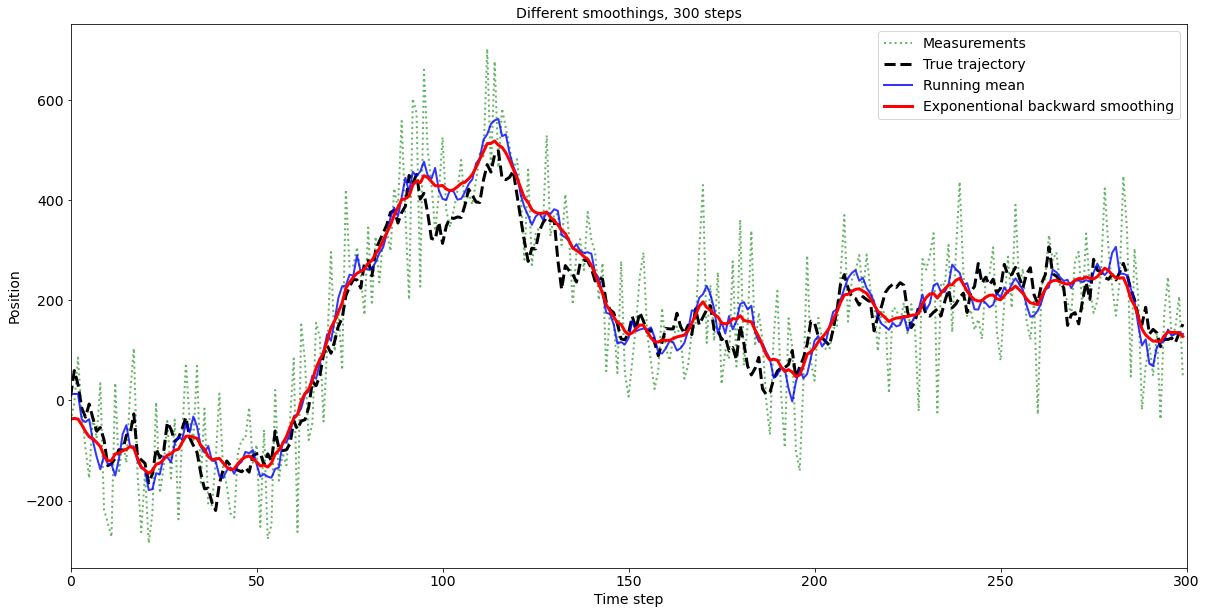

In [4]:
#Running mean
running_mean = np.zeros((1, 300))
beg_RM = sum(measurements[0:3])/3
end_RM = sum(measurements[297:300])/3
for i in range(Points):
    if i <= 2:
        running_mean[0, i] = beg_RM
    elif i >= Points - 3:
        running_mean[0, i] = end_RM
    else:
        running_mean[0, i] = 1/M * sum(measurements[i-3:i+4])

#Exponential backward mean
measurements_smoothed_b[0, Points-1] = measurements_smoothed[0, Points-1]
for i in range(1, Points):
    measurements_smoothed_b[0, Points-i-1] = measurements_smoothed_b[0, Points-i] + alfa*(measurements_smoothed[0, Points-1-i] - measurements_smoothed_b[0, Points-i])


fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Different smoothings, 300 steps', fontsize = 14)
ax.set_ylabel('Position', fontsize = 14)
ax.set_xlabel('Time step', fontsize = 14)

ax.plot(measurements, ':g', alpha = 0.6,  linewidth = 2, label = 'Measurements')
ax.plot(path, '--k', linewidth = 3, alpha = 1, label = 'True trajectory')
ax.plot(running_mean[0, :], 'b', alpha = 0.8, linewidth = 2, label = 'Running mean')
ax.plot(measurements_smoothed_b[0, :], 'r', linewidth = 3, label = 'Exponentional backward smoothing')
plt.xlim(0, 300)
ax.tick_params(axis='both', labelsize=14)
plt.legend(fontsize = 14)
plt.show()

In [5]:
#Comparesing
Var_run = 0
Var_exp = 0
Deviation_run = sum((measurements[:] - running_mean[0, :])**2)
Deviation_exp = sum((measurements[:] - measurements_smoothed_b[0, :])**2)
print('Deviation of running mean:', Deviation_run)
print('Deviation of exponentional backward mean:', Deviation_exp)

for i in range(0, 298):
    Var_run += (running_mean[0, i+2] - 2*running_mean[0, i+1] + running_mean[0, i])**2
    #print(Var_run)
    Var_exp += (measurements_smoothed_b[0, i+2] - 2*measurements_smoothed_b[0, i+1] + measurements_smoothed_b[0, i])**2

print('Variability indicator of running mean:', Var_run)
print('Variability indicator of exponentional backward mean:', Var_exp)


Deviation of running mean: 2459571.810051789
Deviation of exponentional backward mean: 2339081.6621268317
Variability indicator of running mean: 243605.42387843062
Variability indicator of exponentional backward mean: 16192.34650066999


## PART II


## First trajectory 

In [6]:
#Part 2
#First trajectory
size = 300
x0 = 5
v0 = 0
T = 0.1
sigma_a_2 = 10
sigma_eta_2 = 500

In [7]:
def motion(x_init, velocity_init):
    a = np.random.normal(0, np.sqrt(sigma_a_2))
    xi = x_init + velocity_init * T + a*(T**2)/2
    vi = velocity_init + a*T
    zi = xi + np.random.normal(0, np.sqrt(sigma_eta_2))
    return [xi, vi, zi]

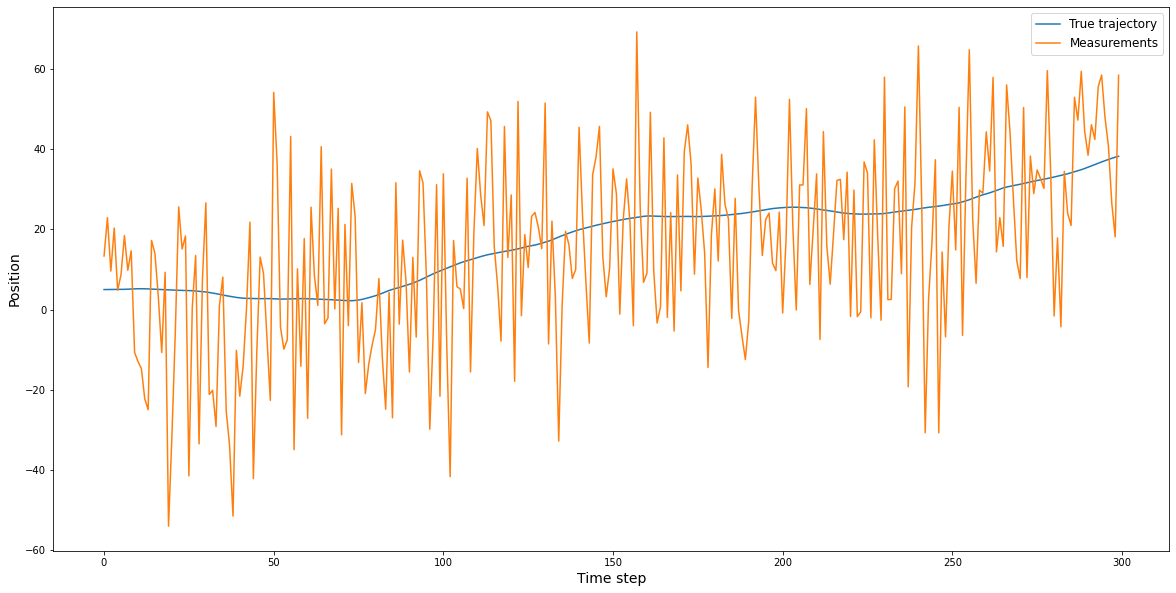

In [8]:
trajectory = []
measurements_2 = []

for i in range (size):
    if i == 0:
        motionn = motion(x0, v0)
        trajectory.append(motionn[0])
        velocity = motionn[1]
        measurements_2.append(motionn[2])
    else:
        motionn = motion(trajectory[i-1], velocity)
        trajectory.append(motionn[0])
        velocity = motionn[1]
        measurements_2.append(motionn[2])

fig, ax = plt.subplots(figsize = (20,10))
ax.set_ylabel('Position', fontsize = 14)
ax.set_xlabel('Time step', fontsize = 14)
ax.plot(trajectory[:], label='True trajectory')
ax.plot(measurements_2[:], label='Measurements')
plt.legend(fontsize = 12)

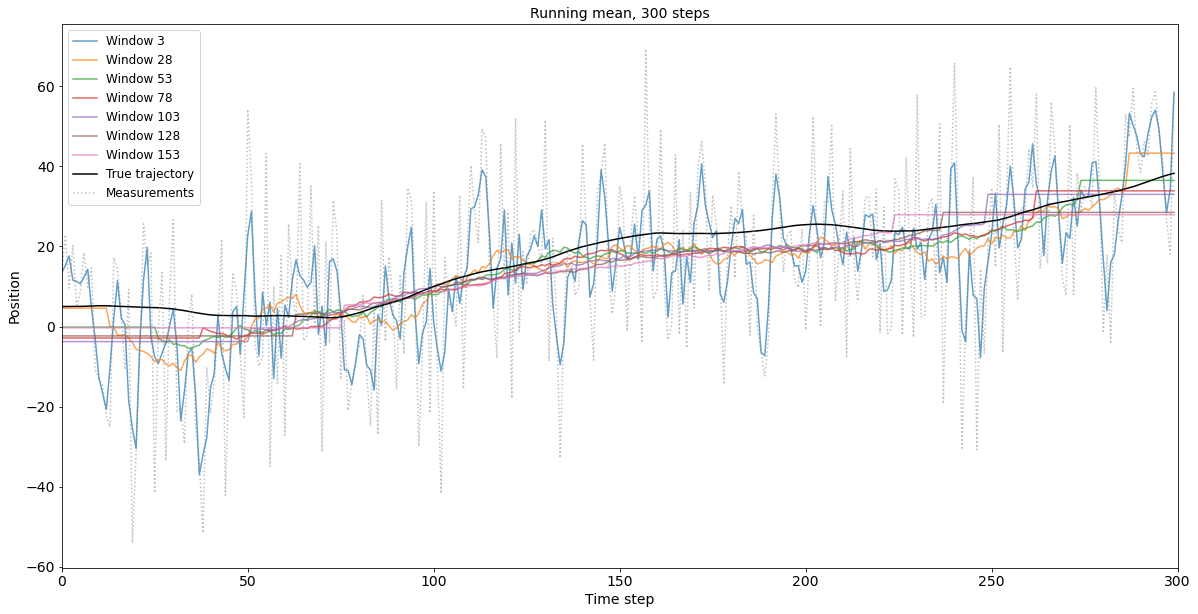

In [9]:
#M definition with large options window
M = np.arange(3, 154, 25)
running_mean_M = np.zeros((len(M), 300))
beg_RM = np.zeros((len(M), 1))
end_RM = np.zeros((len(M), 1))
for i in range (len(M)):
    beg_RM[i] = sum(measurements_2[0:int((M[i]-1)/2)])/((M[i]-1)/2)
    end_RM[i] = sum(measurements_2[300 - int((M[i]-1)/2):300])/((M[i]-1)/2)

#Deviation
Deviation_M = np.zeros((len(M), 1))

for k in range(len(M)):
    for i in range(Points):
        if i <= int((M[k]-1)/2) - 1:
            running_mean_M[k, i] = beg_RM[k]
        elif i >= Points - int((M[k]-1)/2):
            running_mean_M[k, i] = end_RM[k]
        else:
            running_mean_M[k, i] = 1/M[k] * sum(measurements_2[i-int((M[k]-1)/2):i+int((M[k]-1)/2)+1])
    Deviation_M[k] = sum((measurements_2[:] - running_mean_M[k, :])**2)

fig, ax = plt.subplots(figsize = (20,10))
ax.set_title('Running mean, 300 steps', fontsize = 14)
ax.set_ylabel('Position', fontsize = 14)
ax.set_xlabel('Time step', fontsize = 14)

for i in range(len(M)):
    ax.plot(running_mean_M[i, :], alpha = 0.7, label = 'Window '+ str(M[i]))
ax.plot(trajectory, 'k', markersize = 2, label = 'True trajectory')
ax.plot(measurements_2, ':', alpha = 0.5, label = 'Measurements')

ax.tick_params(axis='both', labelsize=14)
plt.legend(fontsize = 12)
plt.xlim(0, 300)
plt.show()
a = min(Deviation_M)

In [10]:
#Variability indicators and certain M determination
Var_M = np.zeros((len(M), 1))

for k in range(len(M)):
    for i in range(0, Points-2):
        Var_M[k] += (running_mean_M[k, i+2] - 2*running_mean_M[k, i+1] + running_mean_M[k, i])**2
        #print(Var_run)
        #Var_exp += (measurements_smoothed_b[0, i+2] - 2*measurements_smoothed_b[0, i+1] + measurements_smoothed_b[0, i])**2
M_precise = M[np.where(Var_M[:, 0] == np.min(Var_M))]
print(M[np.where(Var_M[:, 0] == np.min(Var_M))])

[128]


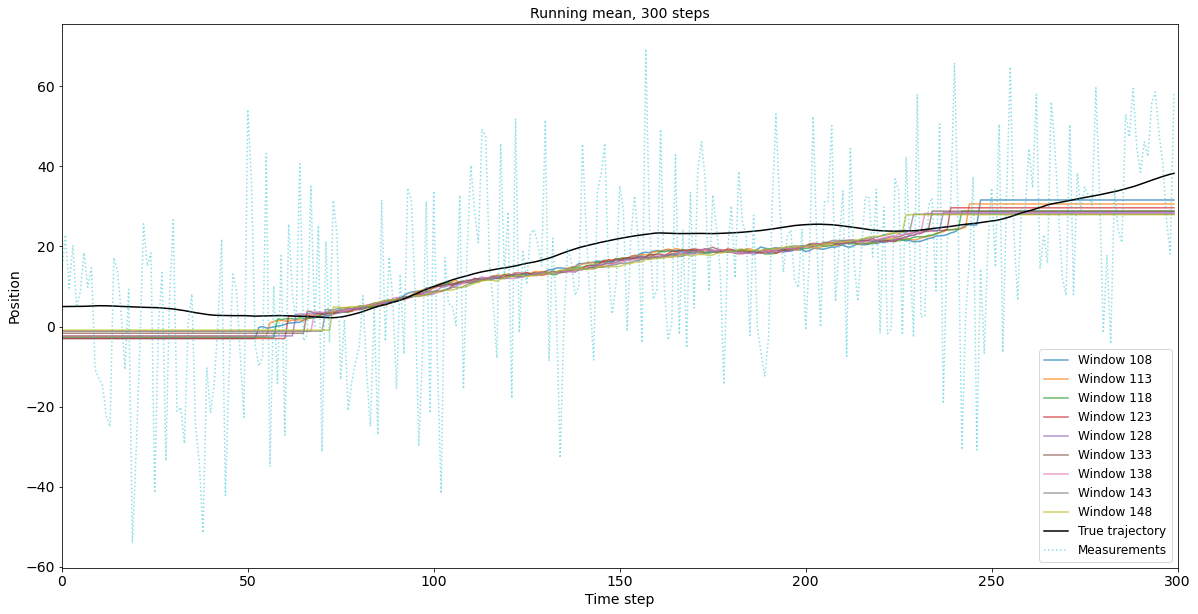

The most appropriate window size M = 138


In [11]:
#M definition with small options window
M = np.arange(M_precise - 20, M_precise + 21, 5)
running_mean_M = np.zeros((len(M), 300))
beg_RM = np.zeros((len(M), 1))
end_RM = np.zeros((len(M), 1))
for i in range (len(M)):
    beg_RM[i] = sum(measurements_2[0:int((M[i]-1)/2)])/((M[i]-1)/2)
    end_RM[i] = sum(measurements_2[300 - int((M[i]-1)/2):300])/((M[i]-1)/2)

Deviation_M_final = np.zeros((len(M), 1))

for k in range(len(M)):
    for i in range(Points):
        if i <= int((M[k]-1)/2) - 1:
            running_mean_M[k, i] = beg_RM[k]
        elif i >= Points - int((M[k]-1)/2):
            running_mean_M[k, i] = end_RM[k]
        else:
            running_mean_M[k, i] = 1/M[k] * sum(measurements_2[i-int((M[k]-1)/2):i+int((M[k]-1)/2)+1])
    Deviation_M_final[k] = sum((measurements_2[:] - running_mean_M[k, :])**2)

fig, ax = plt.subplots(figsize = (20,10))
ax.set_title('Running mean, 300 steps', fontsize = 14)
ax.set_ylabel('Position', fontsize = 14)
ax.set_xlabel('Time step', fontsize = 14)

for i in range(len(M)):
    ax.plot(running_mean_M[i, :], alpha = 0.7, label = 'Window '+ str(M[i]))
ax.plot(trajectory, 'k', markersize = 2, label = 'True trajectory')
ax.plot(measurements_2, ':', alpha = 0.5, label = 'Measurements')

ax.tick_params(axis='both', labelsize=14)
plt.legend(fontsize = 12)
plt.xlim(0, 300)
plt.show()

#Variability indicators and plots for precised M
Var_M_final = np.zeros((len(M), 1))

for k in range(len(M)):
    for i in range(0, Points-2):
        Var_M_final[k] += (running_mean_M[k, i+2] - 2*running_mean_M[k, i+1] + running_mean_M[k, i])**2

M_precise_final = M[np.where(Var_M_final[:, 0] == np.min(Var_M_final))]
print('The most appropriate window size M =', M_precise_final[0])

In [12]:
#Alpha calculations with large options window
alpha = np.arange(0.01, 1.01, 0.05)
exp_smooth_a = np.zeros((len(alpha), 300))
Deviation_alpha = np.zeros((len(alpha), 1))

for k in range(len(alpha)):
    for n in range(size):
        if n == 0:
            exp_smooth_a[k, n] = measurements_2[0]
        else:
            exp_smooth_a[k, n] = exp_smooth_a[k, n-1] + alpha[k]*(measurements_2[n] - exp_smooth_a[k, n-1])
    Deviation_alpha[k] = sum((measurements_2[:] - exp_smooth_a[k, :])**2)

#Variation calculating
Var_alpha = np.zeros((len(alpha), 1))

for k in range(len(alpha)):
    for i in range(0, Points-2):
        Var_alpha[k] += (exp_smooth_a[k, i+2] - 2*exp_smooth_a[k, i+1] + exp_smooth_a[k, i])**2

In [13]:
#Normolized parameters and alpha determination
Var_alpha_norm = np.zeros((len(alpha), 1))
Deviation_alpha_norm = np.zeros((len(alpha), 1))
Compare_alpha = np.zeros((len(alpha), 1))

Var_alpha_norm[:] = Var_alpha[:] / sum(Var_alpha)
Deviation_alpha_norm[:] = Deviation_alpha[:] / sum(Deviation_alpha)
Compare_alpha [:] = Var_alpha_norm [:] + 0.05* Deviation_alpha_norm [:]

alpha_precise = alpha[np.where(Compare_alpha[:, 0] == np.min(Compare_alpha))]

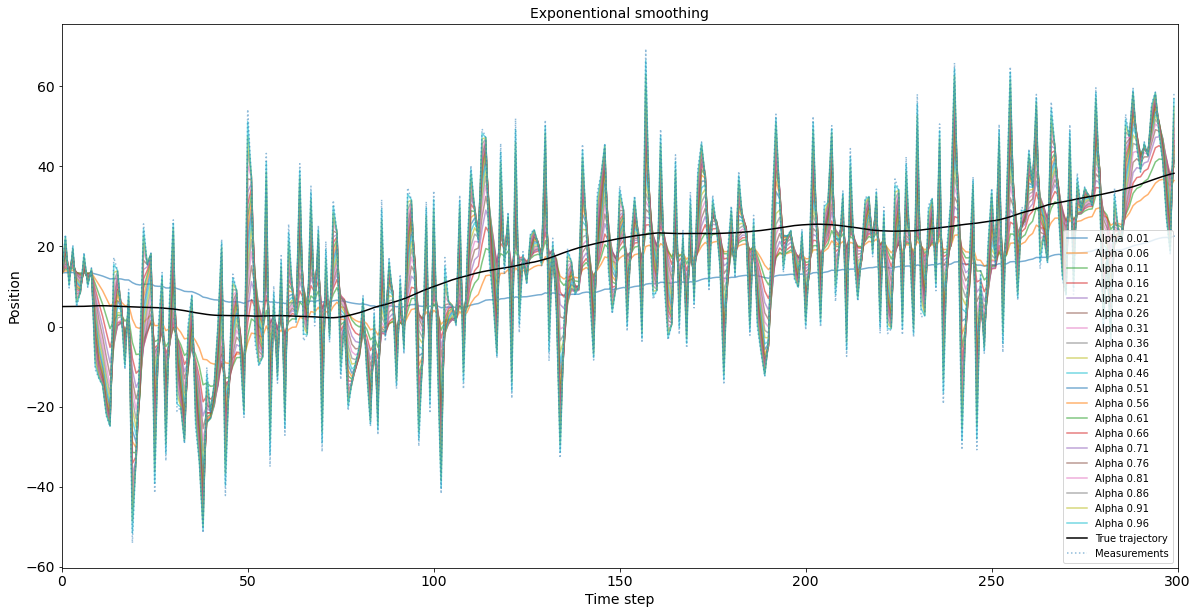

In [14]:
fig, ax = plt.subplots(figsize = (20,10))
ax.set_title('Exponentional smoothing', fontsize = 14)
ax.set_ylabel('Position', fontsize = 14)
ax.set_xlabel('Time step', fontsize = 14)

for i in range(len(alpha)):
    ax.plot(exp_smooth_a[i, :], alpha = 0.6, label = 'Alpha '+ str(round(alpha[i], 2)))
ax.plot(trajectory, 'k', markersize = 2, label = 'True trajectory')
ax.plot(measurements_2, ':', alpha = 0.5, label = 'Measurements')

ax.tick_params(axis='both', labelsize=14)
plt.legend()
plt.xlim(0, 300)
plt.show()


According to recieved results, the best smoothing occures when alpha is smaller than 0.2 that's why the range 0 < alpha < 0.2 should be considered

In [15]:
#Alpha with small options window
if (alpha_precise-0.05) >= 0:
    alpha = np.arange(alpha_precise - 0.05 , alpha_precise + 0.06, 0.02)
else:
    alpha = np.arange(0, alpha_precise + 0.06, 0.02)
exp_smooth_a_final = np.zeros((len(alpha), 300))
Deviation_alpha_final = np.zeros((len(alpha), 1))
Var_alpha_final = np.zeros((len(alpha), 1))

for k in range(len(alpha)):
    for n in range(size):
        if n == 0:
            exp_smooth_a_final[k, n] = measurements_2[0]
        else:
            exp_smooth_a_final[k, n] = exp_smooth_a_final[k, n-1] + alpha[k]*(measurements_2[n] - exp_smooth_a_final[k, n-1])
    Deviation_alpha_final[k] = sum((measurements_2[:] - exp_smooth_a_final[k, :])**2)

#Variation calculating
for k in range(len(alpha)):
    for i in range(0, Points-2):
        Var_alpha_final[k] += (exp_smooth_a_final[k, i+2] - 2*exp_smooth_a_final[k, i+1] + exp_smooth_a_final[k, i])**2

Var_alpha_final_norm = np.zeros((len(alpha), 1))
Deviation_alpha_final_norm = np.zeros((len(alpha), 1))
Compare_alpha_final = np.zeros((len(alpha), 1))

Var_alpha_final_norm[:] = Var_alpha_final[:] / sum(Var_alpha_final)
Deviation_alpha_final_norm[:] = Deviation_alpha_final[:] / sum(Deviation_alpha_final)
Compare_alpha_final [:] = 0.25 * Var_alpha_final_norm [:] + Deviation_alpha_final_norm [:]


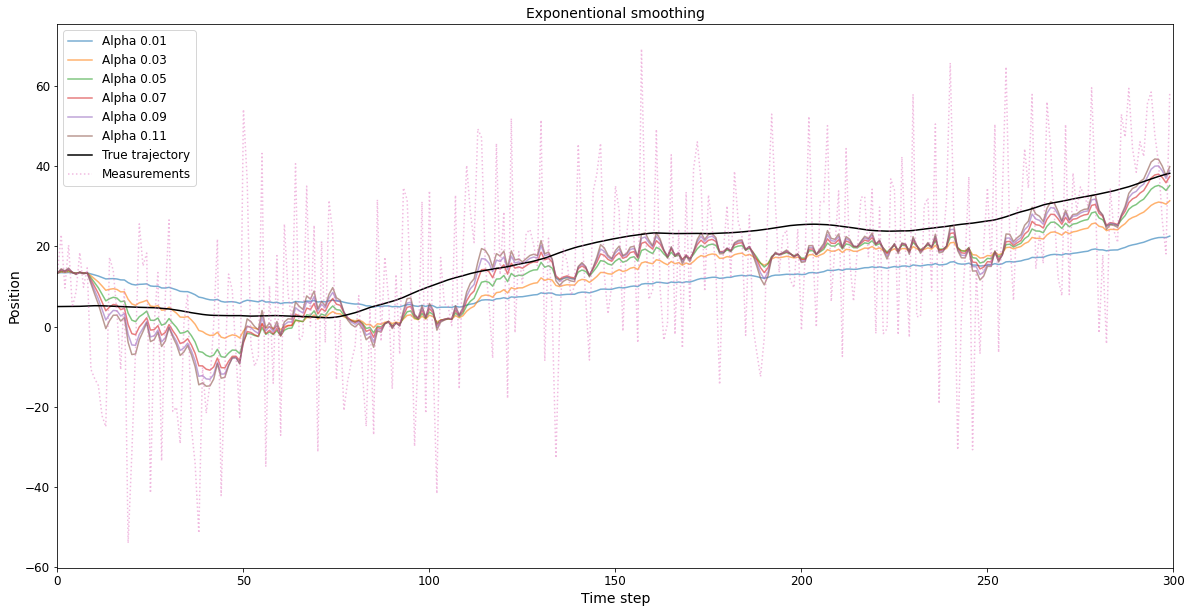

The most appropriate alpha = 0.03


In [16]:
#Plotting new alpha

fig, ax = plt.subplots(figsize = (20,10))
ax.set_title('Exponentional smoothing', fontsize = 14)
ax.set_ylabel('Position', fontsize = 14)
ax.set_xlabel('Time step', fontsize = 14)

for i in range(len(alpha)):
    ax.plot(exp_smooth_a_final[i, :], alpha = 0.6, label = 'Alpha '+ str(round(alpha[i], 2)))
ax.plot(trajectory, 'k', markersize = 2, label = 'True trajectory')
ax.plot(measurements_2, ':', alpha = 0.5, label = 'Measurements')

ax.tick_params(axis='both', labelsize=12)
plt.legend(fontsize = 12)
plt.xlim(0, 300)
plt.show()

alpha_final = alpha[np.where(Compare_alpha_final[:, 0] == np.min(Compare_alpha_final))]
print('The most appropriate alpha =', round(alpha_final[0], 2))


Running mean deviation = 130161.41768610806
Exponentional smoothing deviation = 130287.74154103214
Running mean variability indicator = 100.70582971207963
Exponentional smoothing variability indicator = 25.91933314205565


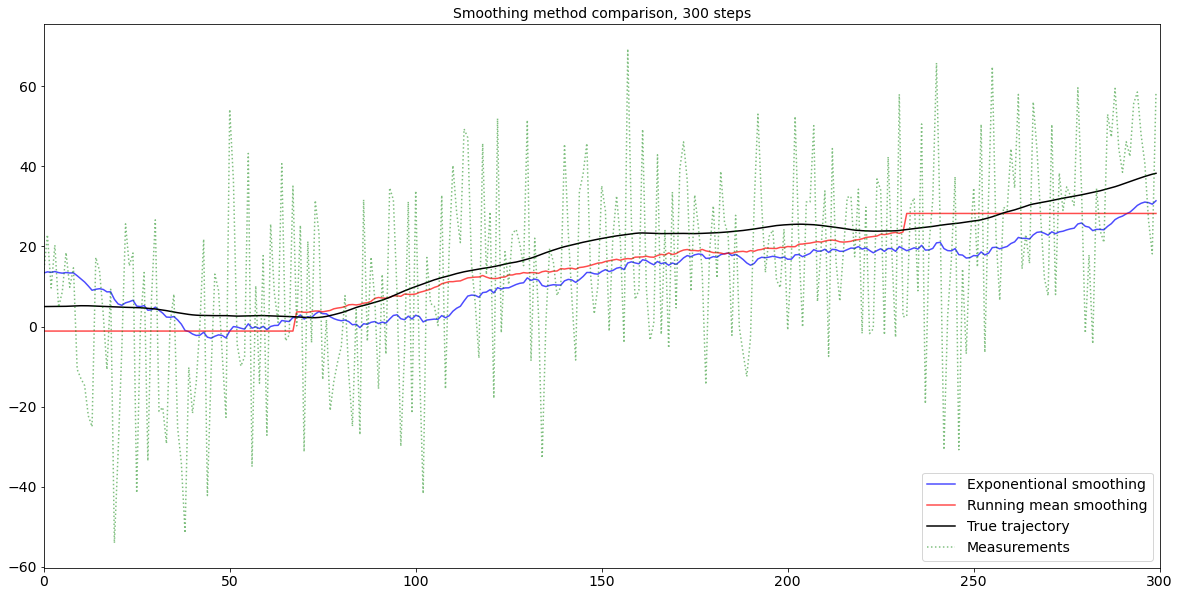

In [17]:
#Best smoothing method smoothing
print('Running mean deviation =', Deviation_M_final[np.where(Var_M_final[:, 0] == np.min(Var_M_final))][0][0])
print('Exponentional smoothing deviation =', Deviation_alpha_final[np.where(Compare_alpha_final[:, 0] == np.min(Compare_alpha_final))][0][0])

print('Running mean variability indicator =', Var_M_final[np.where(Var_M_final[:, 0] == np.min(Var_M_final))][0][0])
print('Exponentional smoothing variability indicator =', Var_alpha_final[np.where(Var_alpha_final[:, 0] == np.min(Var_alpha_final))][0][0])

fig, ax = plt.subplots(figsize = (20,10))
ax.set_title('Smoothing method comparison, 300 steps', fontsize = 14)

ax.plot(exp_smooth_a_final[(np.where(Compare_alpha_final[:, 0] == np.min(Compare_alpha_final)))[0][0], :], 'b', markersize = 2, alpha = 0.7, label = 'Exponentional smoothing')
ax.plot(running_mean_M[np.where(Var_M_final[:, 0] == np.min(Var_M_final))[0][0], :], 'r', markersize = 2, alpha = 0.7, label = 'Running mean smoothing')
ax.plot(trajectory, 'k', markersize = 3, label = 'True trajectory')
ax.plot(measurements_2, ':g', alpha = 0.5, label = 'Measurements')

ax.tick_params(axis='both', labelsize=14)
plt.legend(fontsize = 14)
plt.xlim(0, 300)
plt.show()

## Second trajectory

In [18]:
#Size of trajectory
n = 200

#Intialization of arrays
x3 = np.zeros((n, 1))
z3 = np.zeros((n, 1))
A = np.zeros((n, 1))
X_ch = np.zeros((16,1))
X_ch2 = np.zeros((16,1))

A[0]= 1
A1 = 1
M = 15
# The period of the true trajectory
T = 32
M_half = int(M/2)

#Variance of noise
sigma_w = 0.08**2
sigma_eta2 = 0.05

w = np.random.normal(0, np.sqrt(sigma_w), n-1)
eta2 = np.random.normal(0, np.sqrt(sigma_eta2), n)
run_mean = np.zeros((n, 1))

# Generation of A
for i in range(1,len(A)-1):
    A[i] = A[i-1] + w[i]

# Generation of true trajectory Xi
for i in range(len(x3)):
    x3[i] = A1*np.sin((np.pi*2*(i)/T) +3)  
    
    
# Generation of a sinus trajectory    
for i in range(16):
    X_ch[i] = np.sin(np.pi*2*(i)/T + np.pi/2)

# Generation of measurements Zi of the process Xi
for i in range(len(z3)):
    z3[i] = x3[i] + eta2[i]

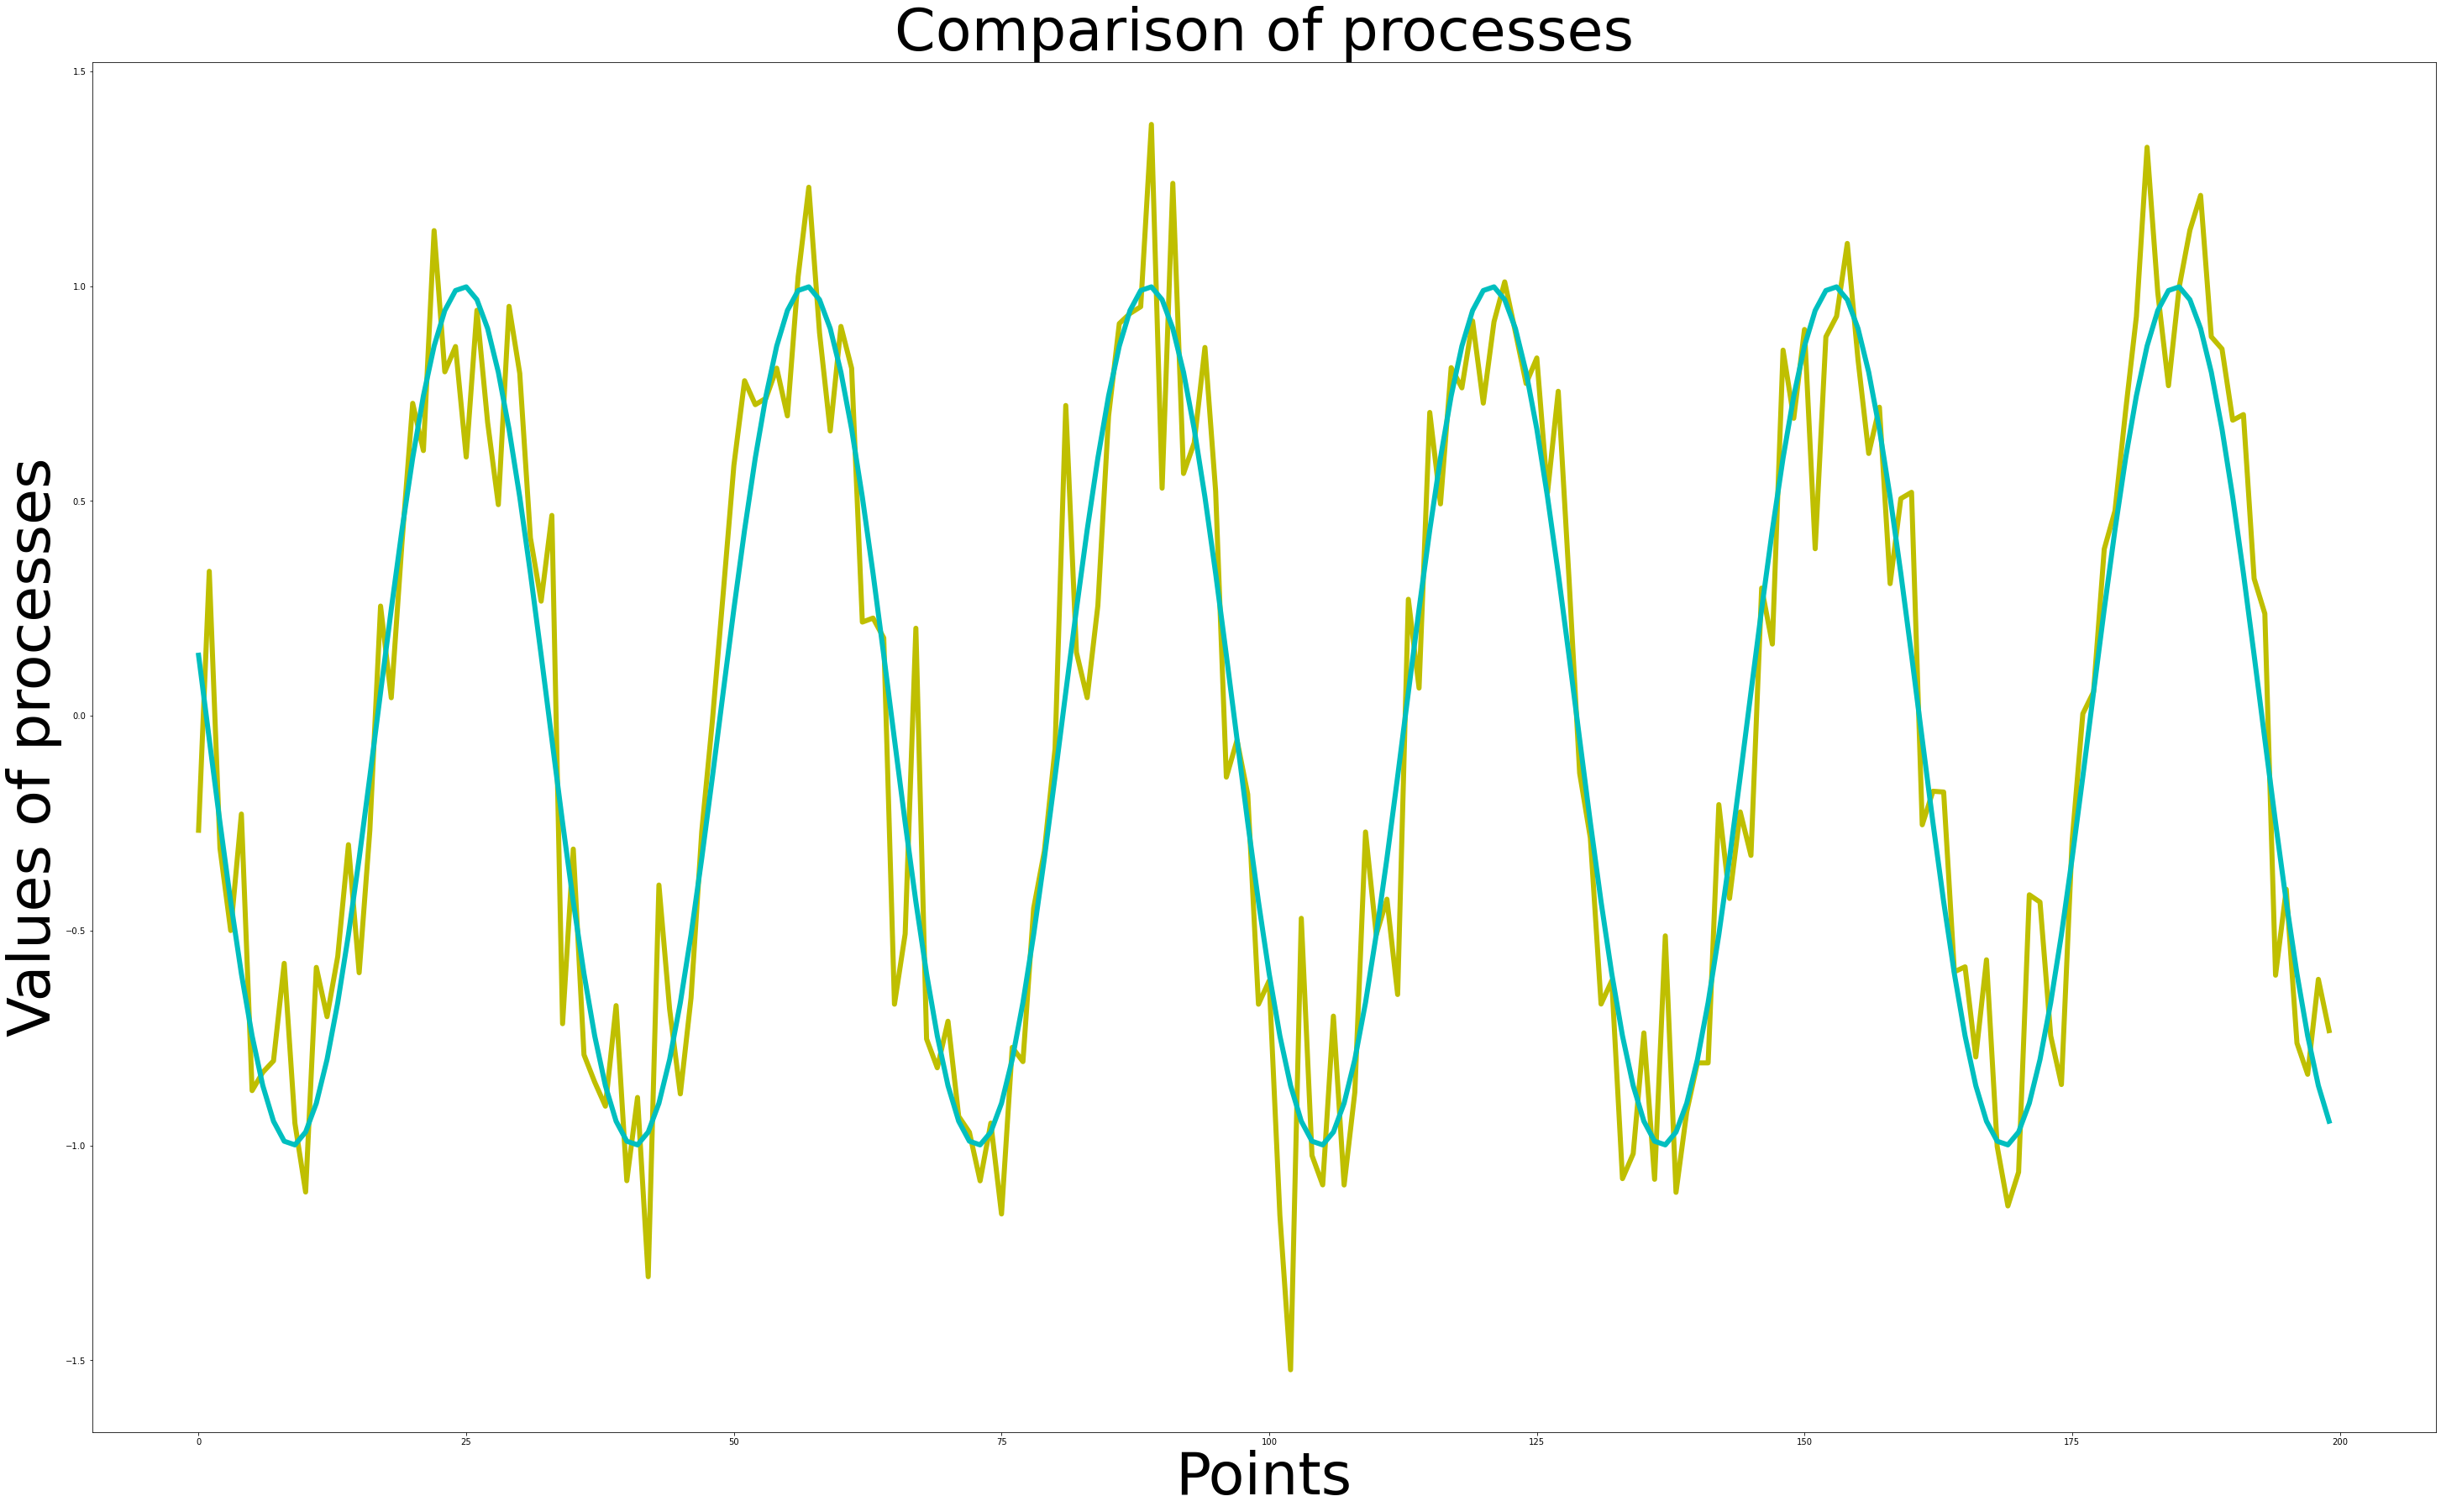

In [19]:
fig, ax = plt.subplots(figsize=(50, 30))
ax.set_title("Comparison of processes", fontsize = 70)
ax.set_ylabel("Values of processes", fontsize = 70)
ax.set_xlabel("Points", fontsize = 70)
ax.plot(z3, linewidth = 6, label = "Measurements Zi", color = "y")
ax.plot(x3, linewidth = 6, label = "True trajectory Xi", color = "c")

In [20]:
# definition Running Mean function
def running_mean(M_half, z3):
    beg_mean = np.sum(z3[:M_half])/len(z3[:M_half])
    end_mean = np.sum(z3[len(z3)-M_half:])/len(z3[len(z3)-M_half:])

    for i in range(len(z3)):
        if i <= M_half-1:
            run_mean[i] = beg_mean
        elif i >= len(z3)-M_half:
            run_mean[i] = end_mean
        else:
            run_mean[i] = np.sum(z3[i-M_half:i+M_half+1])/len(z3[i-M_half:i+M_half+1])
    return run_mean

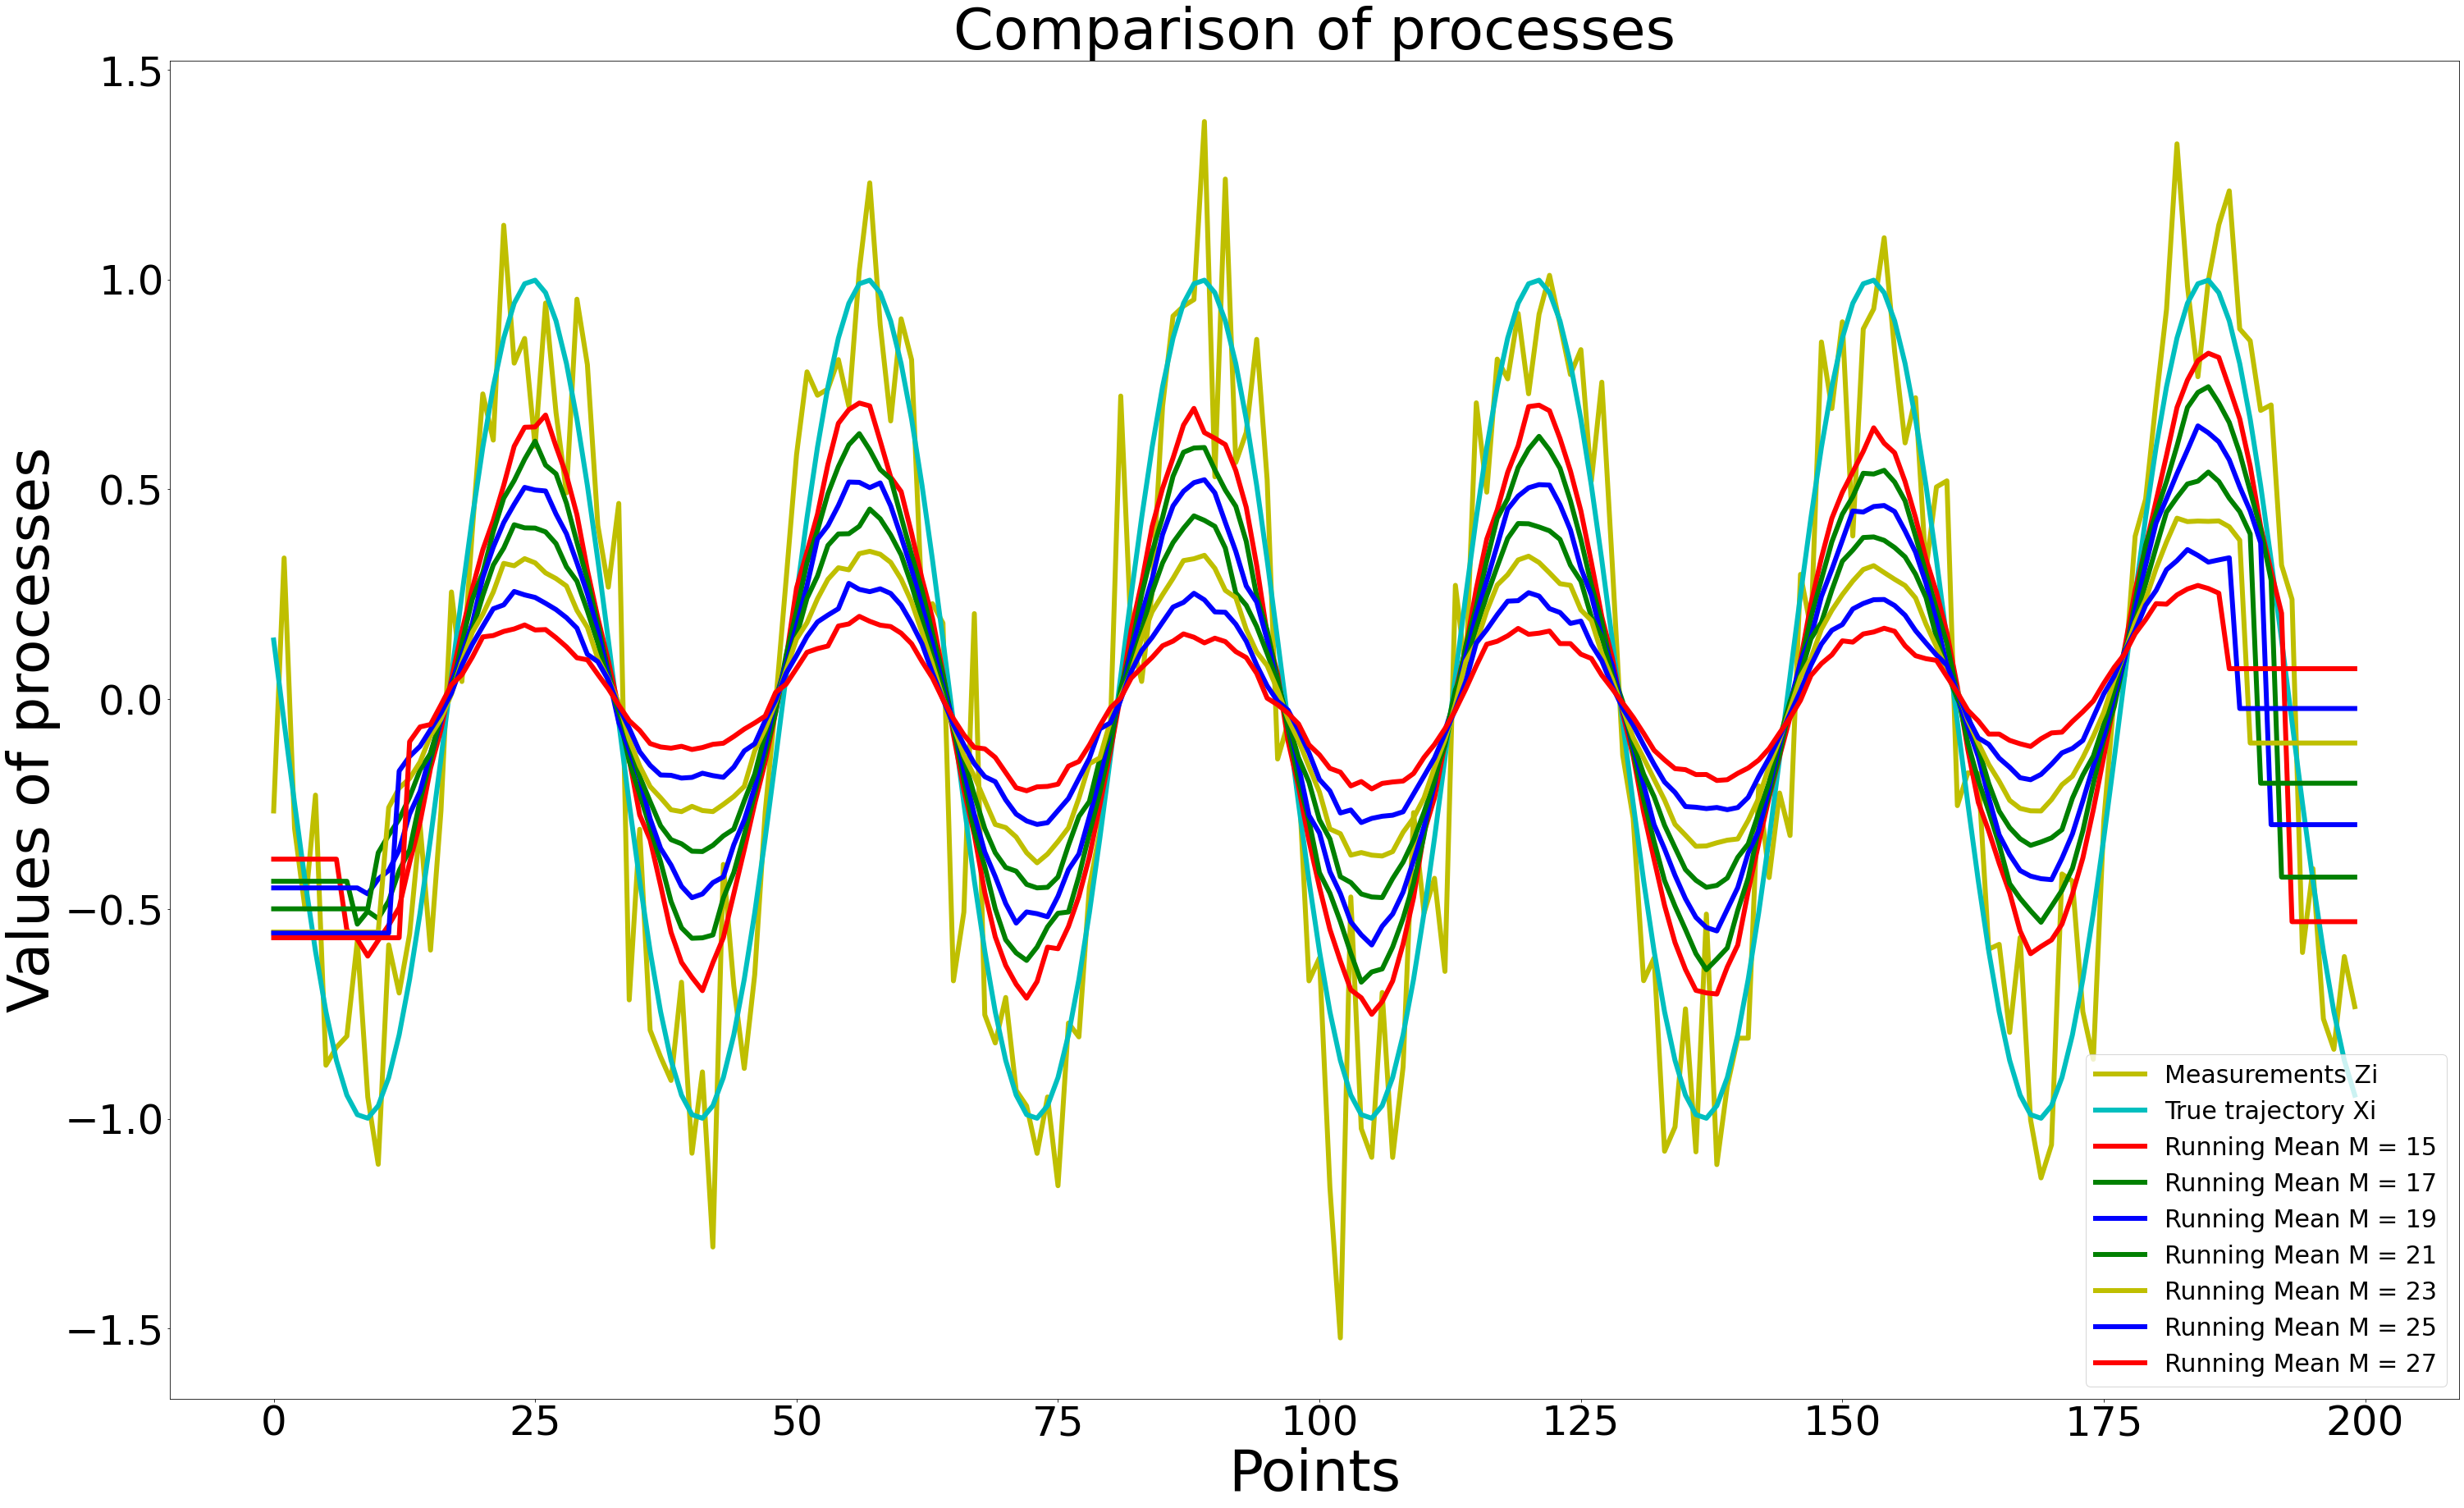

In [21]:
fig, ax = plt.subplots(figsize=(50, 30))
ax.set_title("Comparison of processes", fontsize = 70)
ax.set_ylabel("Values of processes", fontsize = 70)
ax.set_xlabel("Points", fontsize = 70)
ax.plot(z3, linewidth = 6, label = "Measurements Zi", color = "y")
ax.plot(x3, linewidth = 6, label = "True trajectory Xi", color = "c")
#ax.plot(running_mean(2, z3), linewidth = 6, label = 'Running Mean', color = 'r')
ax.plot(running_mean(M_half, z3), linewidth = 6, label = 'Running Mean M = 15', color = 'r')
ax.plot(running_mean(M_half+1, z3), linewidth = 6, label = 'Running Mean M = 17', color = 'g')
ax.plot(running_mean(M_half+2, z3), linewidth = 6, label = 'Running Mean M = 19', color = 'b')
ax.plot(running_mean(M_half+3, z3), linewidth = 6, label = 'Running Mean M = 21', color = 'g')
ax.plot(running_mean(M_half+4, z3), linewidth = 6, label = 'Running Mean M = 23', color = 'y')
ax.plot(running_mean(M_half+5, z3), linewidth = 6, label = 'Running Mean M = 25', color = 'b')
ax.plot(running_mean(M_half+6, z3), linewidth = 6, label = 'Running Mean M = 27', color = 'r')
ax.tick_params(labelsize = 50)
ax.legend(fontsize = 30)